Solution For - https://www.kaggle.com/c/bike-sharing-demand/data

**Data Fields**

1. **datetime** - hourly date + timestamp  
2. **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
3. **holiday** - whether the day is considered a holiday
4. **workingday** - whether the day is neither a weekend nor holiday
5. **weather** - 
    1. Clear, Few clouds, Partly cloudy, Partly cloudy 
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
6. **temp** - temperature in Celsius
7. **atemp** - "feels like" temperature in Celsius
8. **humidity** - relative humidity
9. **windspeed** - wind speed
10. **casual** - number of non-registered user rentals initiated
11. **registered** - number of registered user rentals initiated
12. **count** - number of total rentals

In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
# import train and test data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#rename count to total
train.rename(columns={'count' : 'total'}, inplace=True)
test.rename(columns={'count' : 'total'}, inplace=True)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Get basic informtion about the data

print train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
total         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
None


In [4]:
# Basic data Statistics
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114ce0090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117425310>]], dtype=object)

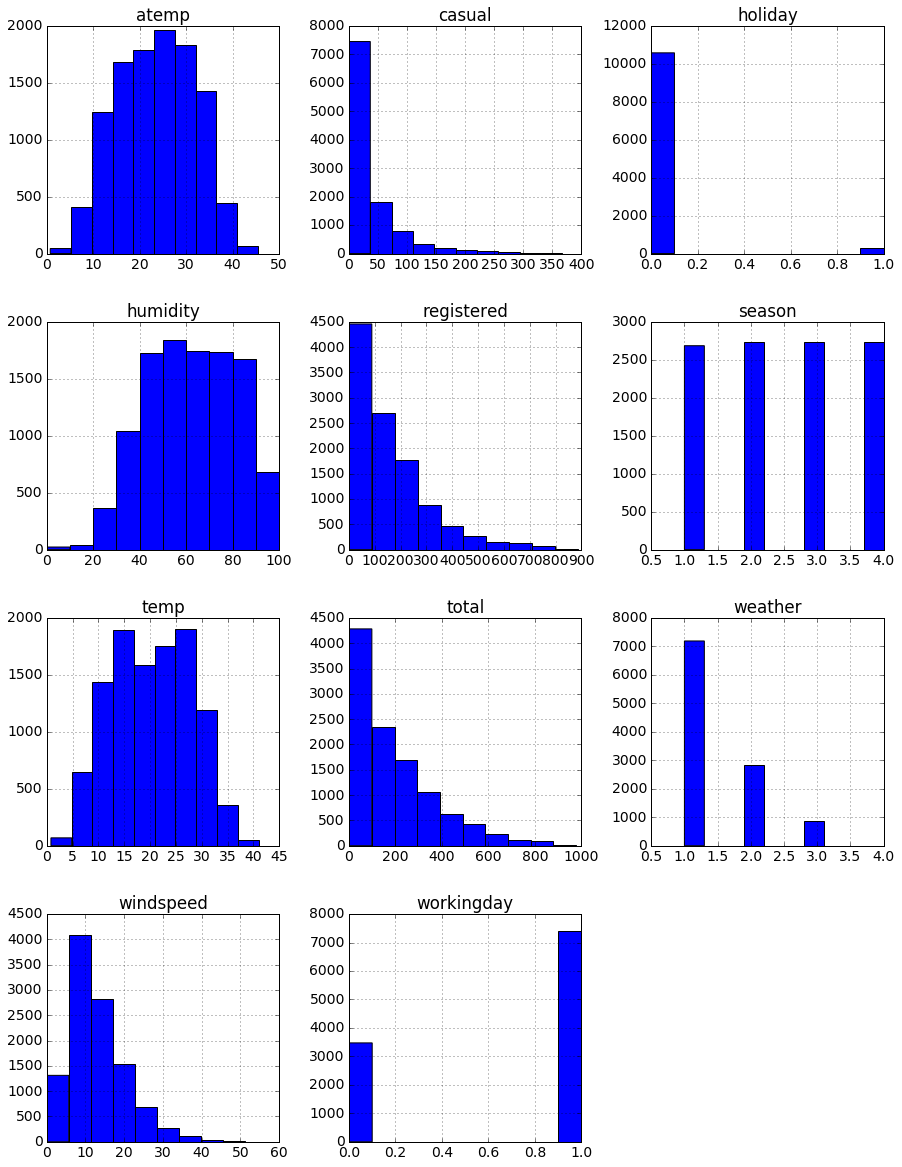

In [5]:
# Visualization
# Univariate Analysis

train.hist(figsize=(15,20))

**Inferences**
1. atemp and temp and windspeed are more or less naturally distrubuted.
2. more data for not holiday.
3. Equal data for all season. Good
4. total is skewed. Can look for ways to make is normally distrubuted
5. More data for clear weather.

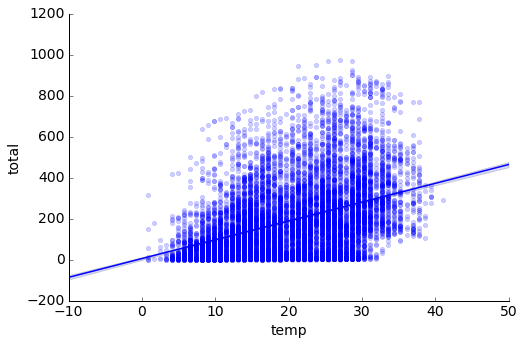

In [6]:
# Bivariate Analysis
# temp and count

sns.lmplot(x='temp',y='total', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

**Inference**

It seems there is a favorable temperature when people rent cycle - around 20 to 30.

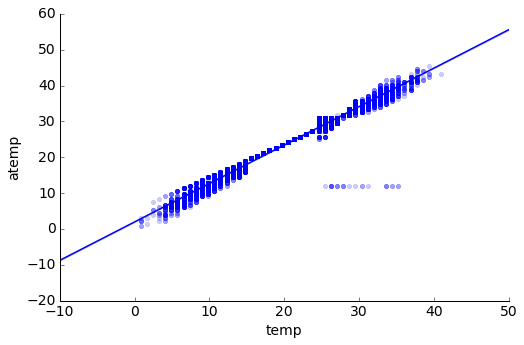

In [7]:
# temp and atemp
# Expected - linear relation. as feel like temperature will be highly dependent on actual temperature

sns.lmplot(x='temp',y='atemp', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

As expected, temp and atemp are linealy co-related. But there are some examples when feel like temperature is less than actual temperature. It might be because of wind. Might look to see the reason. Need to look.

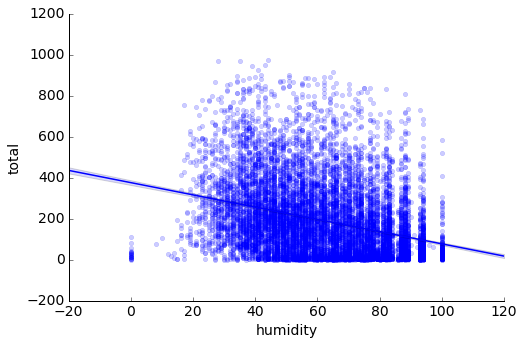

In [8]:
# humidity and count

sns.lmplot(x='humidity',y='total', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

**Inference**
As humidity increase there is decreaase in bike rental

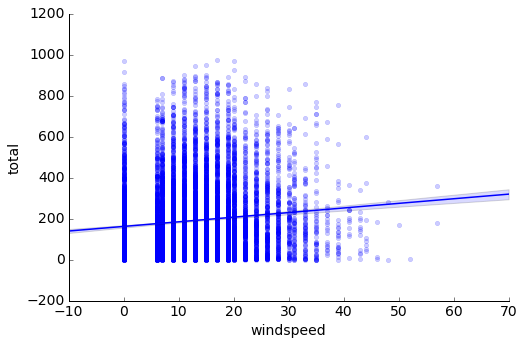

In [9]:
# windspeed and count

sns.lmplot(x='windspeed',y='total', data= train, aspect=1.5, scatter_kws={'alpha':0.2})

**Inference**

It seems people do not prefer renting bike on windy day. 

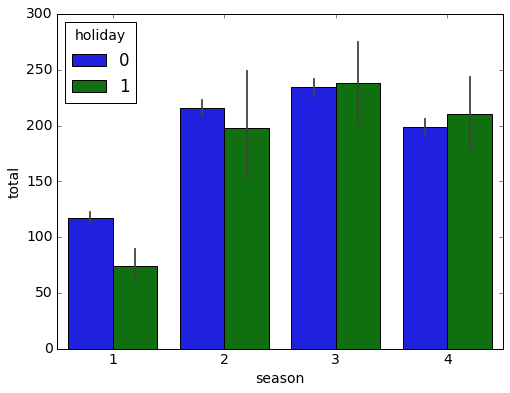

In [10]:
# plotting with categorical data

# season and total

sns.barplot(x="season", y="total", hue="holiday", data=train)

**Inference**

holiday has very less impact on total rent. Season has more influence.

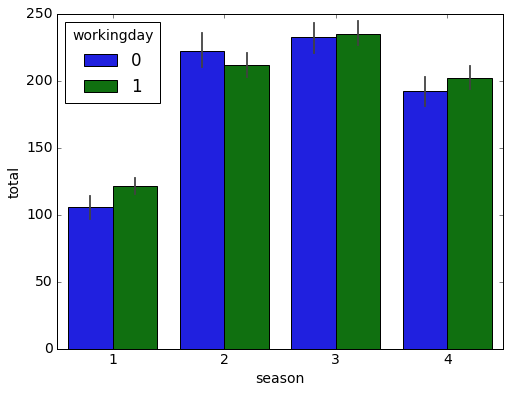

In [11]:
sns.barplot(x="season", y="total", hue="workingday", data=train);

Workingday is also having less impact as with holiday. Let try to extract a new attribute 'weekend' from holiday and workingday.
weekend = !workingday & !holiday in feature extraction step.

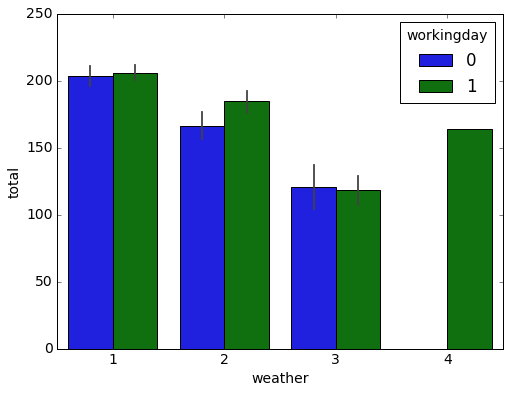

In [12]:
sns.barplot(x="weather", y="total", hue="workingday", data=train);

**Inference**

In case of not heavy rain no one rented cycle if it is not a workingday. It might be people preferred to stay at home.

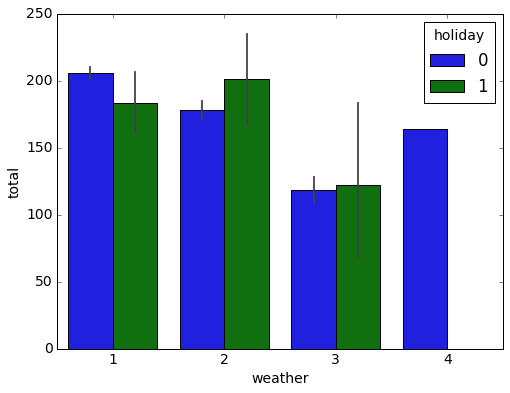

In [13]:
sns.barplot(x="weather", y="total", hue="holiday", data=train);

**Inference**

No one rented a cycle when the weather is raining and it's a holiday. People preferred staying at home.

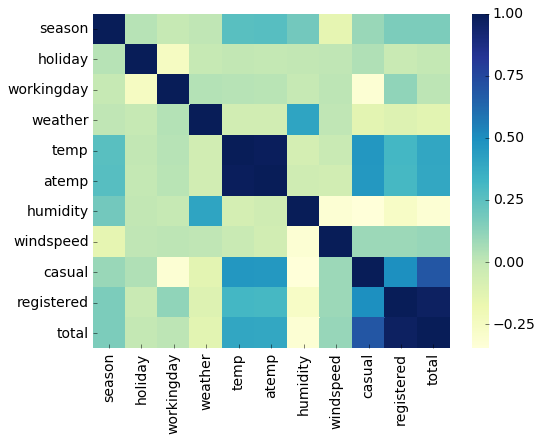

In [14]:
# Let's plot corellation plot for attributes

sns.heatmap(train.corr(), cmap='YlGnBu')

**Feature Extraction**

1. Create weekend from holiday as working day. After that lets see the impact of that on total rented.

In [15]:
def feature_extraction_weekend(df):
    df['weekend'] = (df['holiday'] == 0) & (df['workingday'] == 0)
    return df

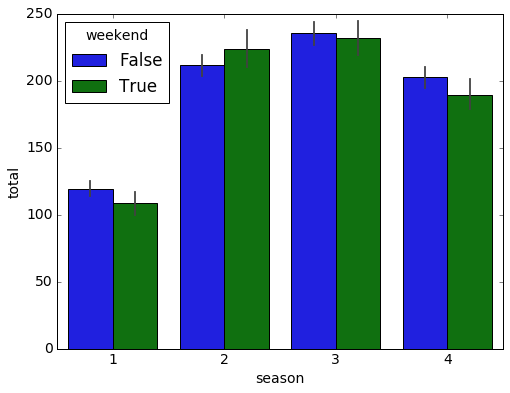

In [16]:
train = feature_extraction_weekend(train)

# see visualization based on weekend

sns.barplot(x="season", y="total", hue="weekend", data=train);

In [17]:
# Feature Extraction

def feature_selection_season(df):
    season_dummies = pd.get_dummies(df.season, prefix='season')
    season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)
    return pd.concat([df, season_dummies], axis=1)

def feature_selection_time(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hours'] = df['datetime'].apply(lambda x: x.hour)
    # Make dummies
    dummies_hour = pd.get_dummies(df.hours, prefix='hour')
    dummies_hour.drop(dummies_hour.columns[0], axis=1, inplace=True)
    return pd.concat([df, dummies_hour], axis=1)
    
    
def feature_selection_month(df):
    df['months'] = df['datetime'].apply(lambda x: x.month)
    # Make dummies
    dummies_month = pd.get_dummies(df.months, prefix='month')
    dummies_month.drop(dummies_month.columns[0], axis=1, inplace=True)
    return pd.concat([df, dummies_month], axis=1)

def feature_selection_year(df):
    df['year'] = df['datetime'].apply(lambda x: x.year)
    return df
    
def feature_selection_dayTime(df):
    df['daytime'] = ((df.hours > 6) & (df.hours < 21)).astype(int)
    return df

In [18]:
train = feature_selection_season(train)
train = feature_selection_time(train)
train = feature_selection_month(train)
train = feature_selection_dayTime(train)
train = feature_selection_year(train)
#train = feature_extraction_weekend(train)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,daytime,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011


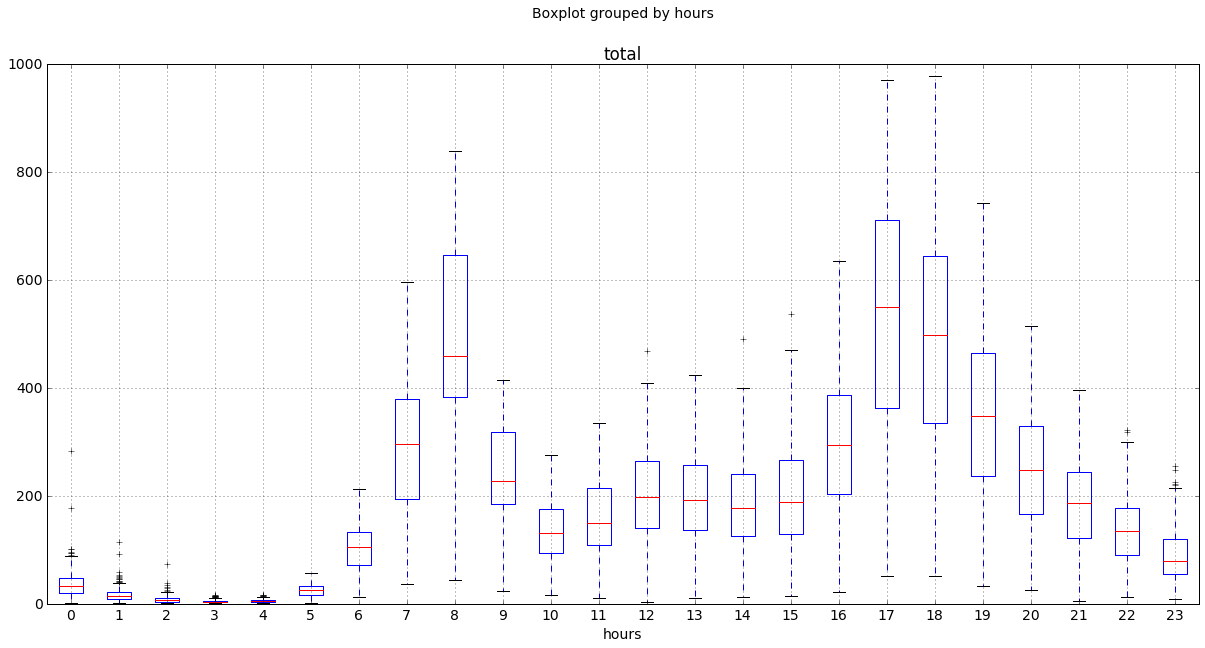

In [19]:
# Visualiation based on extracted features.
# Hour and total

train[train['workingday'] == 1].boxplot(column='total', by='hours', figsize=(20,10))

**Inference**

Cycle renting is more around 7 to 8 and again at 5 to 6. This time matches with start of working time and school going time. lets plot it with hue of not working days.

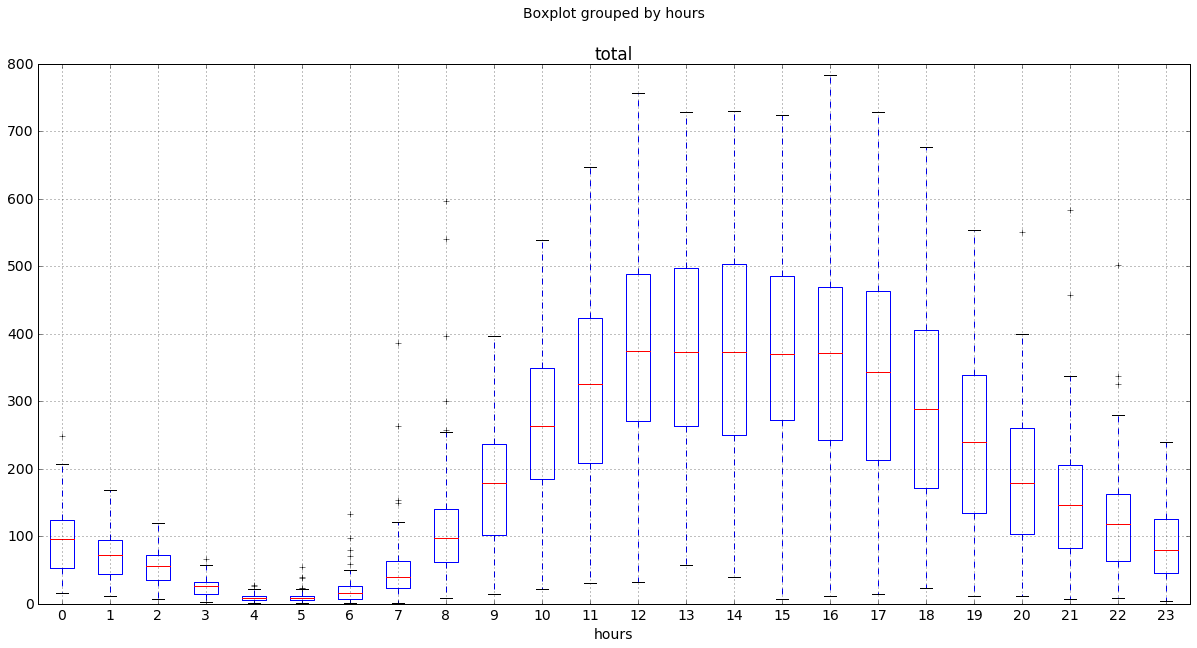

In [20]:
train[train['workingday'] == 0].boxplot(column='total', by='hours', figsize=(20,10))

**Inference**

On not a working day it seems people start late. This is completely in contrast with pattern on working day. On non-working day people prefer renting bike around mid-day, around 12 to 3.

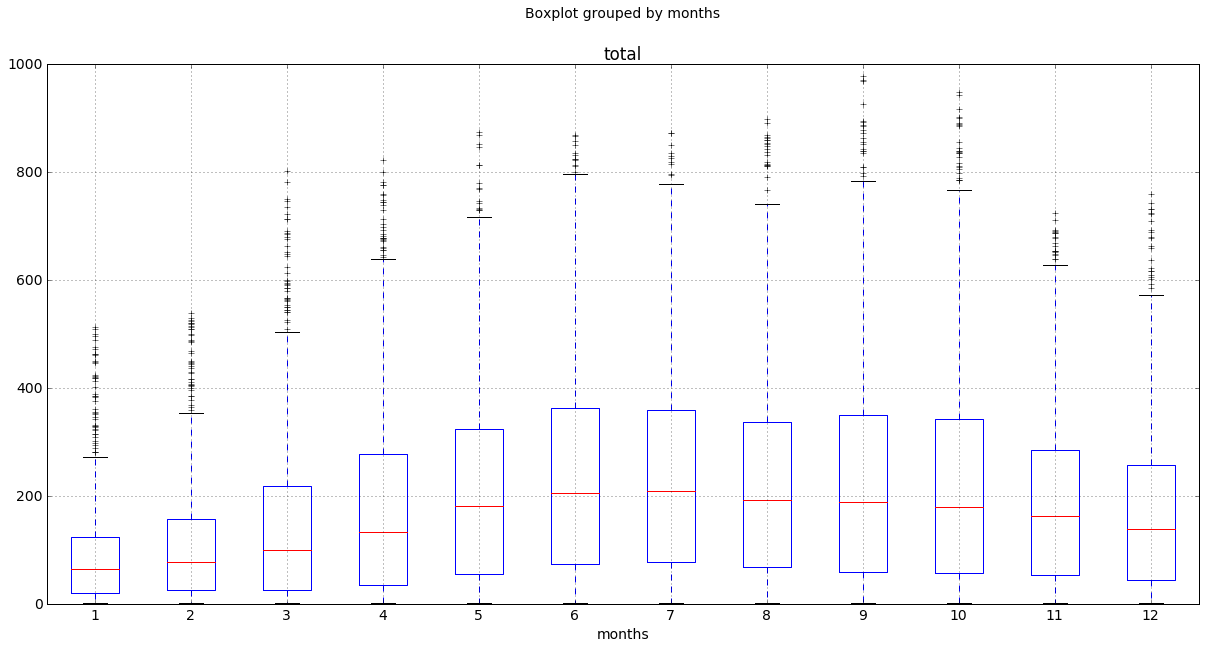

In [21]:
# Month and total

train.boxplot(column='total', by='months', figsize=(20,10))

**Inference**

More rental in June, July. And less in Jan, Feb. 

In [22]:
# Define RMSE error. Used on Kaggle for scoring

def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [30]:
# Drop not needed column - casual','registered','total', 'datetime', 'season', 'hours'

feature_cols = ['casual','registered','total', 'datetime', 'season', 'hours', 'months', 'weekend'] 
y_train = train.total
x_train = train.drop(feature_cols, axis=1)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 46 columns):
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
season_2      10886 non-null float64
season_3      10886 non-null float64
season_4      10886 non-null float64
hour_1        10886 non-null float64
hour_2        10886 non-null float64
hour_3        10886 non-null float64
hour_4        10886 non-null float64
hour_5        10886 non-null float64
hour_6        10886 non-null float64
hour_7        10886 non-null float64
hour_8        10886 non-null float64
hour_9        10886 non-null float64
hour_10       10886 non-null float64
hour_11       10886 non-null float64
hour_12       10886 non-null float64
hour_13       10886 non-null float64
hour_14       10886 non-null float64
hour_15    

In [31]:
# Transform test data

x_test = feature_selection_season(test)
x_test = feature_selection_time(x_test)
x_test = feature_selection_month(x_test)
x_test = feature_selection_dayTime(x_test)
x_test = feature_selection_year(x_test)
#x_test = feature_extraction_weekend(x_test)

test_feature_cols = ['datetime', 'season', 'hours', 'months'] 
x_test = x_test.drop(test_feature_cols, axis=1)

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 46 columns):
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
season_2      6493 non-null float64
season_3      6493 non-null float64
season_4      6493 non-null float64
hour_1        6493 non-null float64
hour_2        6493 non-null float64
hour_3        6493 non-null float64
hour_4        6493 non-null float64
hour_5        6493 non-null float64
hour_6        6493 non-null float64
hour_7        6493 non-null float64
hour_8        6493 non-null float64
hour_9        6493 non-null float64
hour_10       6493 non-null float64
hour_11       6493 non-null float64
hour_12       6493 non-null float64
hour_13       6493 non-null float64
hour_14       6493 non-null float64
hour_15       6493 non-null float64
h

In [32]:
# Linear Model -  Linear Regression

def train_test_linear(X, y):
    X_1, X_2, y_1, y_2 = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_1, y_1)
    y_pred = linreg.predict(X_2)
    return linreg, rmsle(y_2, y_pred)

In [33]:
linear_model, rmse_linear = train_test_linear(x_train, y_train)
print rmse_linear

1.10163716708


In [34]:
#Submission

def submission_file(y_predict, filename):
    submission = pd.DataFrame({
            "count": [max(0, x) for x in y_predict],
            "datetime": test["datetime"]
        })

    submission.to_csv(filename, index=False)

In [35]:
linear_prediction = linear_model.predict(x_test)
submission_file(linear_prediction, "linear_regression_submission.csv")


submission = pd.DataFrame({
            "datetime": test["datetime"],
            "count": [max(0, x) for x in linear_prediction],
        })

submission.head()
submission.to_csv("hello", index=False)

In [36]:
submission.head()

,count,datetime
0,0.0,2011-01-20 00:00:00
1,0.0,2011-01-20 01:00:00
2,0.0,2011-01-20 02:00:00
3,0.0,2011-01-20 03:00:00
4,0.0,2011-01-20 04:00:00


In [37]:
submission = submission[['datetime', 'count']]

submission.head()

,datetime,count
0,2011-01-20 00:00:00,0.0
1,2011-01-20 01:00:00,0.0
2,2011-01-20 02:00:00,0.0
3,2011-01-20 03:00:00,0.0
4,2011-01-20 04:00:00,0.0


In [38]:
submission.to_csv("hello.csv", index=False)

After submission 

- Score - 9.44875

Is the model overfitting ? Check the coefficients.

In [44]:
print linear_model.coef_
print linear_model.intercept_

[ -2.22842158e+00   3.44858104e+00  -2.41948253e+01   2.16095382e+00
   2.58713806e+00  -8.27362208e-01  -6.03240252e-01   7.14640072e+11
   4.84637280e+12   3.93286534e+12  -2.10603954e+01  -2.94979440e+01
  -4.05855072e+01  -4.34851597e+01  -2.34673129e+01   3.10568813e+01
   4.38962977e+11   4.38962977e+11   4.38962977e+11   4.38962977e+11
   4.38962977e+11   4.38962977e+11   4.38962977e+11   4.38962977e+11
   4.38962977e+11   4.38962977e+11   4.38962977e+11   4.38962977e+11
   4.38962977e+11   4.38962977e+11   1.07425695e+02   6.93711487e+01
   3.10373011e+01   1.51802036e+01   2.69143830e+01  -7.14640072e+11
  -7.14640072e+11  -7.14640072e+11  -4.84637280e+12  -4.84637280e+12
  -4.84637280e+12  -3.93286534e+12  -3.93286534e+12  -3.93286534e+12
  -4.38962977e+11   8.72299208e+01]
-175465.810592


Yes !!! The coefficent is to high. Let's try
1. Feature Selection
2. Ridge Regression
3. Lasson Regression

In [45]:
# Lasso Regression
def train_test_lasso(X, y, alpha):
    X_1, X_2, y_1, y_2 = train_test_split(X, y, random_state=123)
    linreg = Lasso(alpha)
    linreg.fit(X_1, y_1)
    y_pred = linreg.predict(X_2)
    return linreg, rmsle(y_2, y_pred)

In [46]:
alpha_values = np.arange(0.1,1.0,0.1)

models = {}
for alpha in alpha_values:
    models[alpha], value = train_test_lasso(x_train, y_train, alpha)
    print alpha, value

0.1 1.10117198421
0.2 1.09946573103
0.3 1.10419793054
0.4 1.09105163654
0.5 1.09502085086
0.6 1.10339064611
0.7 1.10536753318
0.8 1.11281503542
0.9 1.12396675553


In [47]:
lasso_prediction = models[0.4].predict(x_test)
#submission_file(lasso_prediction, "lasso_regression_submission")

submission = pd.DataFrame({
            "datetime": test["datetime"],
            "count": [max(0, x) for x in lasso_prediction],
        })

submission = submission[['datetime', 'count']]
submission.head()
submission.to_csv("hello_lasso", index=False)

Lasso Submission - 1.13233

In [48]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train, y_train)

random_forest_prediction = random_forest_model.predict(x_test)
submission_file(random_forest_prediction, "random_forest_regression_submission.csv")

Random Forest - 0.45423